In [1]:
from tme3 import *


In [2]:
uspsdatatrain = "../data/USPS_train.txt"
uspsdatatest = "../data/USPS_test.txt"
alltrainx,alltrainy = load_usps(uspsdatatrain)
alltestx,alltesty = load_usps(uspsdatatest)
neg = 5
pos = 6
datax,datay = get_usps([neg,pos],alltrainx,alltrainy)
testx,testy = get_usps([neg,pos],alltestx,alltesty)


datax (7291, 256)
lebel 6


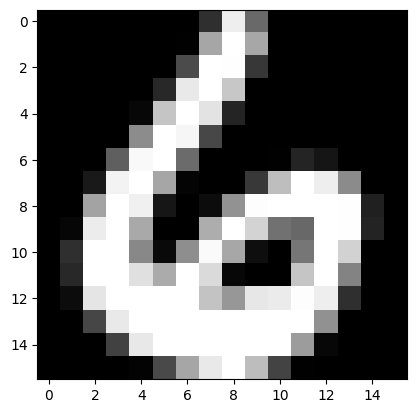

In [3]:
data = alltrainx
lebels = alltrainy
l = 0

print("datax",data.shape)


print("lebel",lebels[l])
show_usps(data[l])

In [4]:
model = Lineaire(loss=perceptron_loss, loss_g=perceptron_grad, max_iter=200, eps=0.1)

model.fit(datax,datay)
print("dataset", datax.shape)
acc = model.score(testx,testy)
print("test", testx.shape)
print("Accuracy:", acc)
print("Dernier coût:", model.cost_history[-1])

dataset (1220, 256)
test (330, 256)
Accuracy: 0.9666666666666667
Dernier coût: 0.012463922566092923


In [5]:
print("w:", model.w.shape)
print("w:", model.w)

w: (256,)
w: [ 6.06281104e-02 -2.00328755e-03  4.12110029e-02  6.14030924e-02
  5.06488784e-01  6.62468111e-01 -3.27661075e-02 -2.13816576e-01
  2.88403887e-01 -4.87215717e-01  3.17725870e-01  2.74487760e-01
  1.44979491e+00  7.05665343e-01 -2.74877554e-01  3.72887854e-02
  2.21629869e-01  3.81777532e-01  6.19639118e-01  9.04158290e-01
  5.32332899e-01  2.13869763e-01  8.52842871e-01  4.74297804e-01
  1.30124776e-01  3.82849428e-01  1.85323373e+00  1.65596648e+00
  7.41824091e-01  4.23512047e-01 -5.77099419e-01 -1.00115136e-01
  5.55022850e-02  7.18887962e-01  9.50603636e-01  1.30348742e+00
  4.58434400e-01  1.12531843e-01  9.68219047e-01  2.65674195e-01
  4.26878871e-01  6.83359448e-01  3.82200891e-01  9.16702136e-01
  1.26051281e+00  1.22125636e-01 -1.95469216e-01  3.61128318e-01
  3.95608798e-01  8.40187014e-01  8.64723643e-01  7.88884688e-01
 -4.05103538e-02 -1.24865429e-01  6.09703740e-01  1.03574017e+00
 -2.32644748e-01  2.71286057e-01 -4.39076706e-01  2.79404438e-01
  1.58038139

In [6]:
Y_train = np.where(alltrainy == 6, 1, -1)
Y_test = np.where(alltesty == 6, 1, -1)
X_train = alltrainx
X_test = alltestx

model = Lineaire(loss=perceptron_loss, loss_g=perceptron_grad, max_iter=200, eps=0.1)
model.fit(X_train, Y_train)
acc = model.score(X_test, Y_test)


print("Accuracy on all data:", acc)
print("Dernier coût on all data:", model.cost_history[-1])
print("w on all data:", model.w.shape)
print("w on all data:", model.w)

Accuracy on all data: 0.041355256601893375
Dernier coût on all data: 0.022034564636608717
w on all data: (256,)
w on all data: [-0.0734985  -0.22274159 -0.24786125 -0.42015328 -1.00474931 -0.66136099
 -0.45639323 -0.46921172 -0.05453401  0.46866519 -0.02264369 -0.54332478
 -0.72402655 -0.20737606 -0.08526589 -0.12010381 -0.08569716 -0.51922669
 -0.66667887 -0.86112125 -0.97774732 -0.76828128 -0.69289792 -1.09890661
 -1.02342592 -0.57740636 -0.56683417 -0.47260479 -0.43716265 -0.41749147
 -0.07538489 -0.0926109   0.22332418 -0.20386417 -0.86469505 -1.25722536
 -0.53290334 -0.15457938 -0.70116393 -0.77759357 -0.20331564 -0.15594054
 -0.21948245 -0.15841015 -0.50176958 -0.36944971 -0.20776602 -0.17769903
  0.06250517 -0.32513799 -0.93926497 -0.99023274 -0.42809836 -0.03208671
 -0.47989887 -0.63434149 -0.26836419 -0.81769497 -0.72783182 -1.00729144
 -1.31513605 -0.77283271 -0.4829104  -0.148466   -0.02750043 -0.41713616
 -0.73224306 -0.67820765 -0.7975756  -0.2866944  -0.33100693 -0.580632

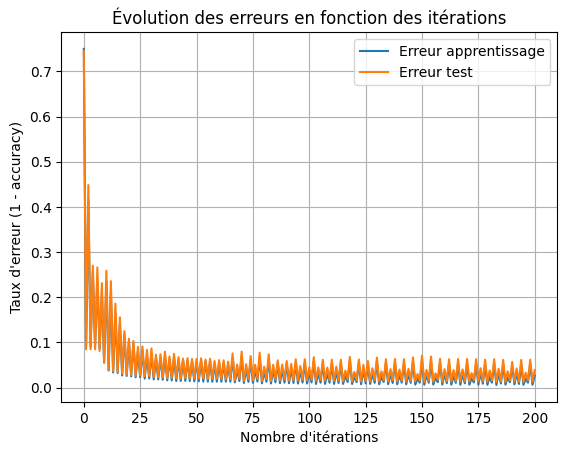

In [9]:
model = Lineaire(loss=perceptron_loss, loss_g=perceptron_grad, max_iter=200, eps=0.1)
model.fit(X_train, Y_train, X_test, Y_test)

iters = np.arange(len(model.train_err_history))

plt.figure()
plt.plot(iters, model.train_err_history, label="Erreur apprentissage")
plt.plot(iters, model.test_err_history, label="Erreur test")
plt.xlabel("Nombre d'itérations")
plt.ylabel("Taux d'erreur (1 - accuracy)")
plt.title("Évolution des erreurs en fonction des itérations")
plt.legend()
plt.grid(True)
plt.show()
# il semble qu'on est en sur-apprentissage

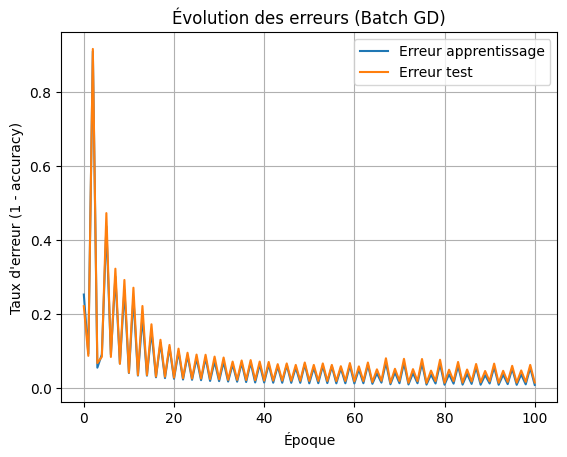

In [ ]:
Y_train = np.where(alltrainy == 6, 1, -1)
Y_test  = np.where(alltesty  == 6, 1, -1)
X_train = alltrainx
X_test  = alltestx
model_batch = Lineaire(perceptron_loss, perceptron_grad, max_iter=100, eps=0.1)
model_batch.fit(X_train, Y_train, testx=X_test, testy=Y_test, batch_size=len(X_train))

# Si fit stocke max_iter + 1 points (avec le point final) :
iters = np.arange(len(model_batch.train_err_history))

plt.figure()
plt.plot(iters, model_batch.train_err_history, label="Erreur apprentissage")
plt.plot(iters, model_batch.test_err_history, label="Erreur test")
plt.xlabel("Époque")  # puisque max_iter = nb d'époques
plt.ylabel("Taux d'erreur (1 - accuracy)")
plt.title("Évolution des erreurs (Batch GD)")
plt.legend()
plt.grid(True)
plt.show()


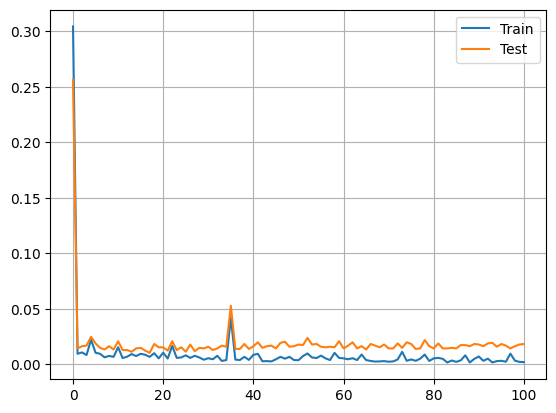

In [ ]:
y_train = np.where(alltrainy == 6, 1, -1)
y_test  = np.where(alltesty  == 6, 1, -1)

X_train = alltrainx.reshape(alltrainx.shape[0], -1)
X_test  = alltestx.reshape(alltestx.shape[0], -1)


model_sgd = Lineaire(perceptron_loss, perceptron_grad, max_iter=100, eps=0.1)
model_sgd.fit(X_train, Y_train, testx=X_test, testy=Y_test, batch_size=1)

iters = np.arange(len(model_sgd.train_err_history))
plt.plot(iters, model_sgd.train_err_history, label="Train")
plt.plot(iters, model_sgd.test_err_history, label="Test")
plt.legend(); plt.grid(True); plt.show()


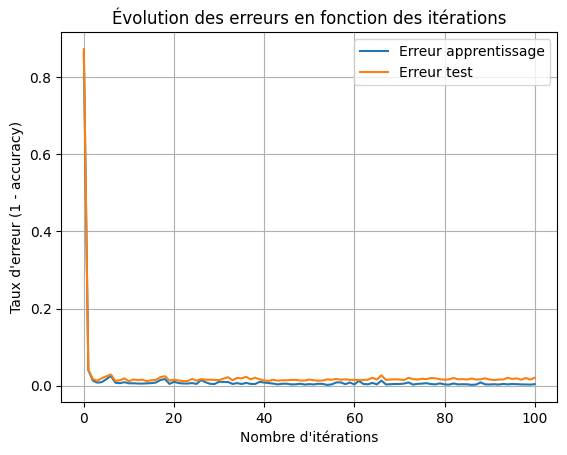

In [ ]:
# Mini-batch (ex: 32)
Y_train = np.where(alltrainy == 6, 1, -1)
Y_test = np.where(alltesty == 6, 1, -1)
X_train = alltrainx
X_test = alltestx

model_mb = Lineaire(perceptron_loss, perceptron_grad, max_iter=100, eps=0.1)
model_mb.fit(X_train, Y_train, X_test, Y_test, batch_size=32)

iters = np.arange(len(model_mb.train_err_history))

plt.figure()
plt.plot(iters, model_mb.train_err_history, label="Erreur apprentissage")
plt.plot(iters, model_mb.test_err_history, label="Erreur test")
plt.xlabel("Nombre d'itérations")
plt.ylabel("Taux d'erreur (1 - accuracy)")
plt.title("Évolution des erreurs en fonction des itérations")
plt.legend()
plt.grid(True)
plt.show()


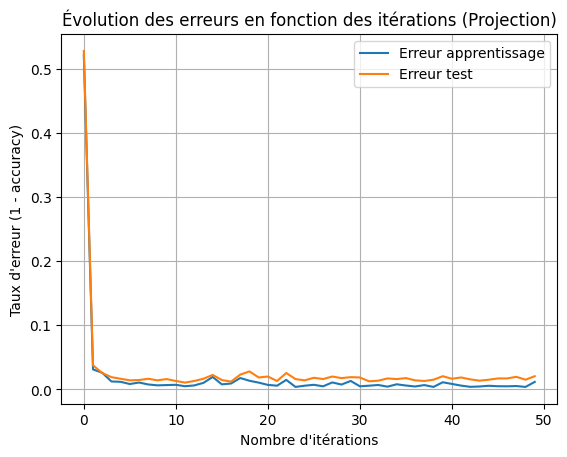

In [6]:
Y_train = np.where(alltrainy == 6, 1, -1)
Y_test = np.where(alltesty == 6, 1, -1)
X_train = alltrainx
X_test = alltestx

model = Lineaire(perceptron_loss, perceptron_grad, max_iter=50, eps=0.01, projection=proj_biais)
model.fit(X_train, Y_train, testx=X_test, testy=Y_test, batch_size=32)
iters = np.arange(len(model.train_err_history))
plt.figure()
plt.plot(iters, model.train_err_history, label="Erreur apprentissage")
plt.plot(iters, model.test_err_history, label="Erreur test")
plt.xlabel("Nombre d'itérations")
plt.ylabel("Taux d'erreur (1 - accuracy)")
plt.title("Évolution des erreurs en fonction des itérations (Projection)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Y_train = np.where(alltrainy == 6, 1, -1)
# Y_test = np.where(alltesty == 6, 1, -1)
# X_train = alltrainx
# X_test = alltestx

# model = Lineaire(perceptron_loss, perceptron_grad, max_iter=50, eps=0.01, projection=proj_poly)
# model.fit(X_train, Y_train, testx=X_test, testy=Y_test, batch_size=32)
# iters = np.arange(len(model.train_err_history))
# plt.figure()
# plt.plot(iters, model.train_err_history, label="Erreur apprentissage")
# plt.plot(iters, model.test_err_history, label="Erreur test")
# plt.xlabel("Nombre d'itérations")
# plt.ylabel("Taux d'erreur (1 - accuracy)")
# plt.title("Évolution des erreurs en fonction des itérations (Projection)")
# plt.legend()
# plt.grid(True)
# plt.show()

KeyboardInterrupt: 

In [5]:


def to_pm1(y):
    y = np.asarray(y).ravel()
    u = np.unique(y)
    if set(u.tolist()) <= {0, 1}:
        return np.where(y == 1, 1, -1)
    return y.astype(int)

def plot_boundary_2d(model, X, y, title="", h=0.02):
    X = np.asarray(X)
    y = to_pm1(y)
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, zz, alpha=0.25)
    plt.contour(xx, yy, zz, levels=[0], linewidths=2)

    plt.scatter(X[y==-1,0], X[y==-1,1], s=18, label="-1")
    plt.scatter(X[y== 1,0], X[y== 1,1], s=18, label="+1")
    plt.title(title)
    plt.grid(True)
    plt.legend()

def plot_base_weights(base, w, topk=10, bias=True):
    """
    base: (b,2)
    w: poids du modèle sur les features [bias, phi_1..phi_b] si bias=True
    """
    if bias:
        w_feat = w[1:]
    else:
        w_feat = w
    idx = np.argsort(np.abs(w_feat))[::-1][:topk]
    sizes = 40 + 260 * (np.abs(w_feat[idx]) / (np.abs(w_feat[idx]).max() + 1e-12))
    plt.scatter(base[idx,0], base[idx,1], s=sizes, marker="x", linewidths=2, label=f"Top-{topk} |w|")


In [6]:
def sample_base(X, b, seed=0):
    rng = np.random.default_rng(seed)
    idx = rng.choice(X.shape[0], size=b, replace=False)
    return X[idx]
def make_proj_gauss(base, sigma, add_bias=True):
    def _p(X):
        Phi = proj_gauss(X, base, sigma)
        if add_bias:
            return np.c_[np.ones(Phi.shape[0]), Phi]
        return Phi
    return _p
    

In [9]:
def run_gauss_on_type(gen_arti, t, n=300, b=50, sigma=0.3,
                      use_hinge=False, alpha=1.0, lam=1e-3,
                      eps=0.1, max_epochs=50, batch_size=32, seed=0):

    X, y = gen_arti(nbex=n, data_type=t, epsilon=0.1)  # adapte si signature différente
    y = to_pm1(y)

    base = sample_base(X, b=b, seed=seed)
    proj = make_proj_gauss(base, sigma, add_bias=True)

    if use_hinge:
        loss = lambda w, Xp, yp: hinge_loss(w, Xp, yp, alpha=alpha, lam=lam)
        grad = lambda w, Xp, yp: hinge_loss_grad(w, Xp, yp, alpha=alpha, lam=lam)
    else:
        loss = perceptron_loss
        grad = perceptron_grad

    model = Lineaire(loss, grad, max_iter=max_epochs, eps=eps, projection=proj)
    model.fit(X, y, batch_size=batch_size, shuffle=True)

    acc = model.score(X, y)

    plt.figure(figsize=(6,5))
    plot_boundary_2d(model, X, y, title=f"type {t} | b={b} sigma={sigma} acc={acc:.3f}")
    plot_base_weights(base, model.w, topk=min(10, b), bias=True)
    plt.legend()
    plt.show()

    return model, base


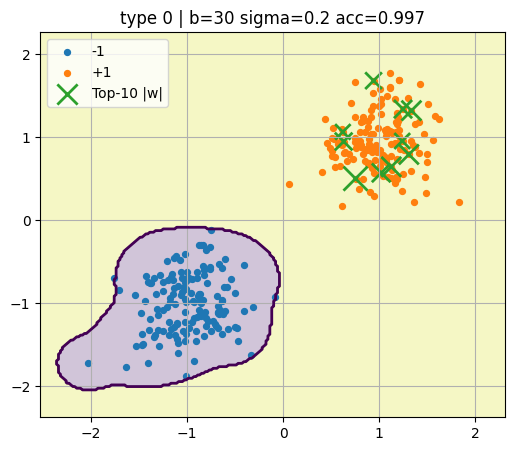

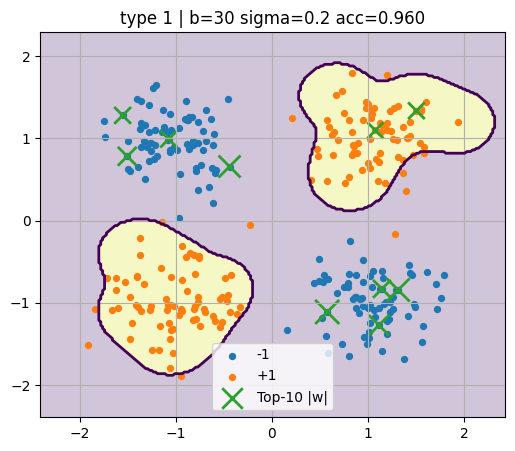

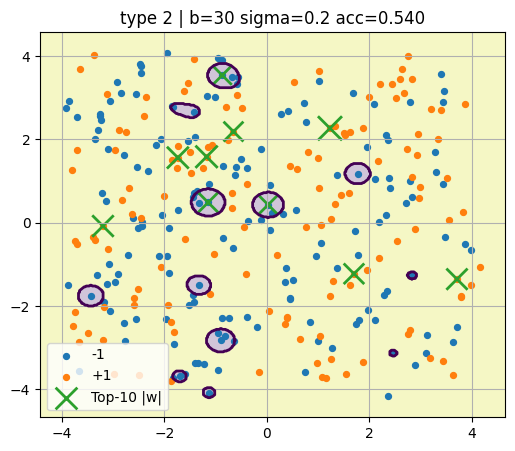

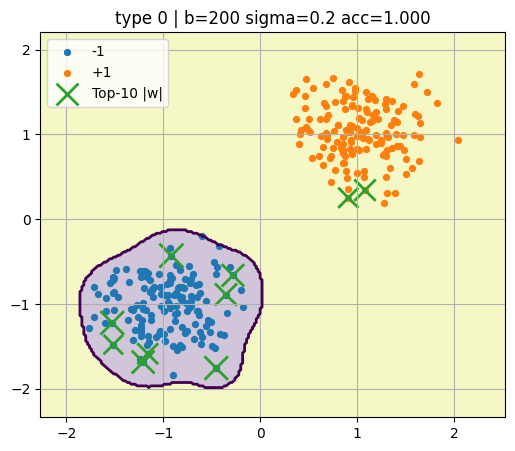

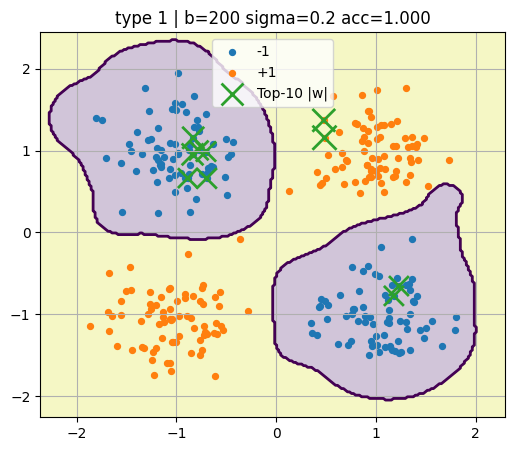

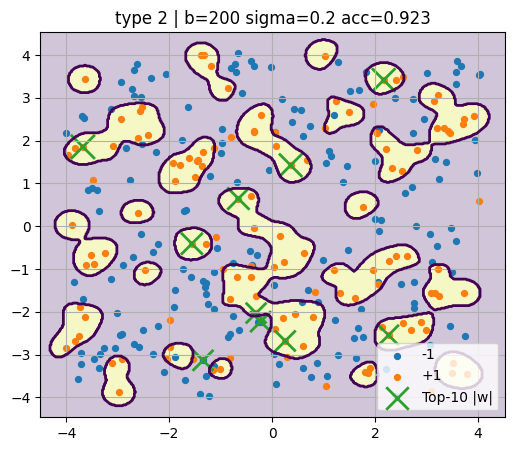

In [12]:
for t in [0,1,2]:
    run_gauss_on_type(gen_arti, t, n=300, b=30, sigma=0.2, use_hinge=False)

for t in [0,1,2]:
    run_gauss_on_type(gen_arti, t, n=300, b=200, sigma=0.2, use_hinge=False)


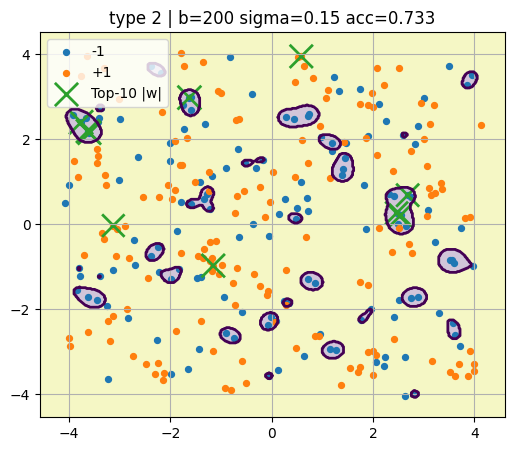

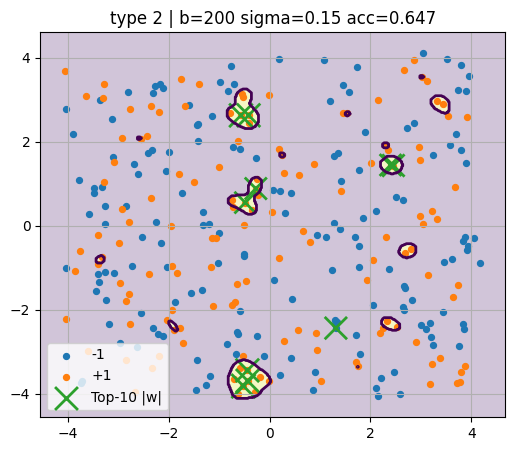

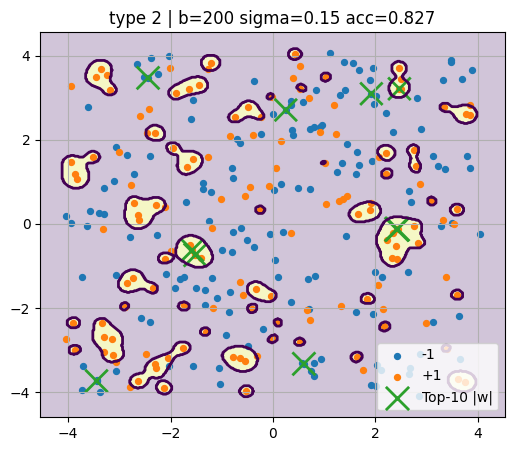

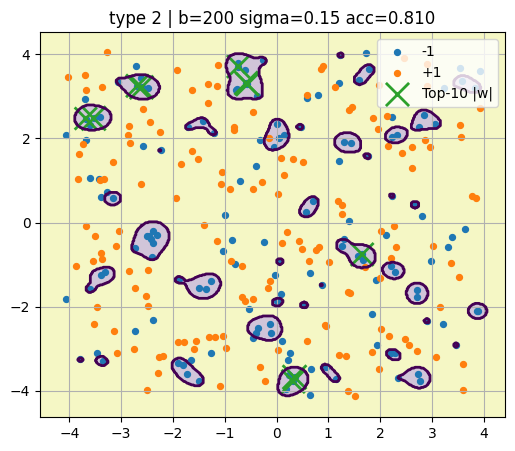

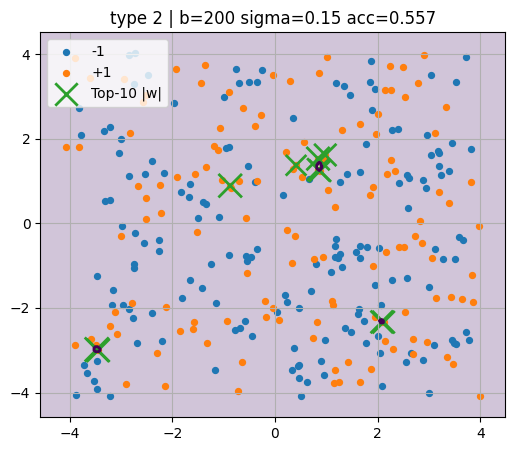

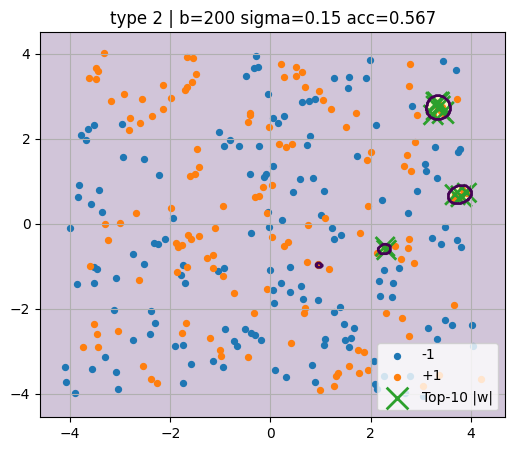

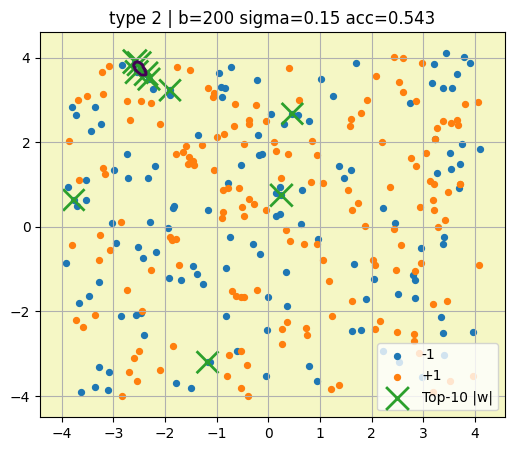

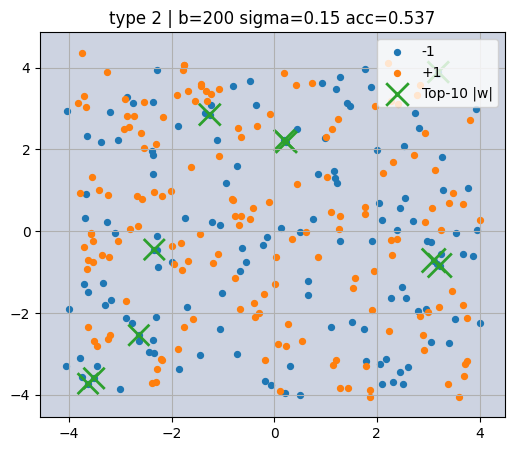

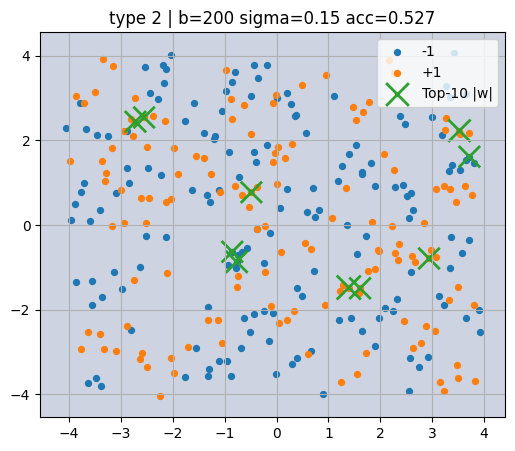

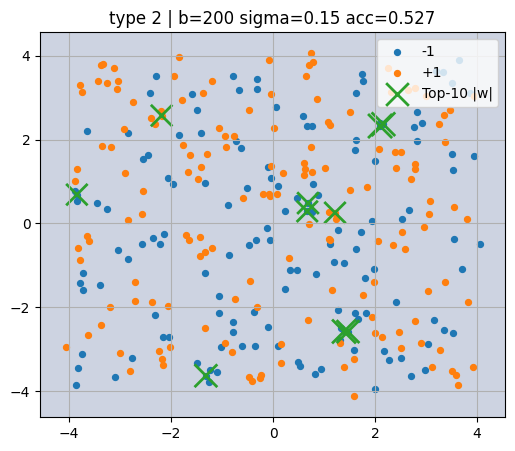

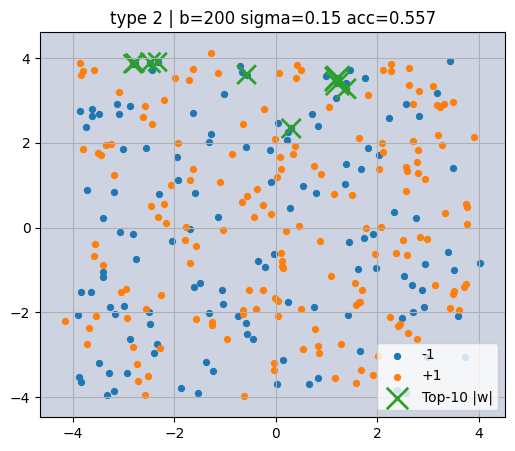

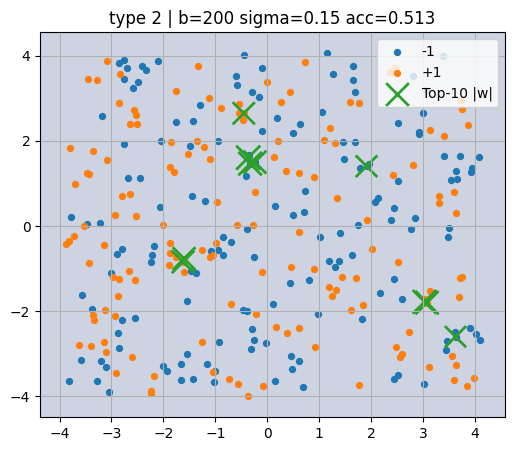

In [15]:
for alpha in [0.5, 1.0, 2.0]:
    for lam in [0.0, 1e-4, 1e-3, 1e-2]:
        run_gauss_on_type(gen_arti, 2, n=300, b=200, sigma=0.15,
                          use_hinge=True, alpha=alpha, lam=lam,
                          eps=0.05, max_epochs=80, batch_size=32)
